Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8613 - loss: 0.4780
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9542 - loss: 0.1534
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9679 - loss: 0.1070
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9735 - loss: 0.0874
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9775 - loss: 0.0734
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Image: pngwing.com.png
Predicted Probabilities for each class (0-9):
Class 0: 0.00%
Class 1: 0.00%
Class 2: 96.39%
Class 3: 0.00%
Class 4: 0.00%
Class 5: 3.57%
Class 6: 0.00%
Class 7: 0.04%
Class 8: 0.00%
Class 9: 0.00%

Predicted Label: 2


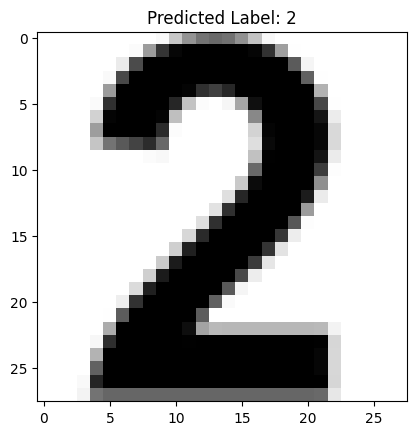

In [6]:
import os
import tensorflow as tf
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

os.environ["CUDA_VISIBLE_DEVICES"] = ""

# 1. 이미지 파일이 저장된 폴더 경로
folder_path = '/home/seokwoo/Desktop/RealSWoo/mnist/'  # 현재 작업 디렉토리

# 2. 폴더 내의 모든 이미지 파일 목록 가져오기
image_files = [f for f in os.listdir(folder_path) if f.endswith('.png')]  # PNG 이미지 파일만 선택

# 3. MNIST 모델 정의 (여기서는 간단한 예시 모델 사용)
# MNIST 데이터셋 로드 (훈련된 모델을 사용할 경우, 이 부분은 건너뛰어도 됩니다)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # 데이터 정규화

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# MNIST 데이터로 모델 훈련
model.fit(x_train, y_train, epochs=5)

# 4. 각 이미지에 대해 예측 수행
for image_file in image_files:
    # 1. 이미지 파일 불러오기
    img = Image.open(os.path.join(folder_path, image_file))  # 이미지 경로 지정
    
    # 2. 이미지 전처리
    img = img.convert('L')  # 그레이스케일로 변환 (흑백)
    img = img.resize((28, 28))  # 28x28 크기로 리사이즈 (MNIST 모델 입력 크기)

    # 3. 이미지를 numpy 배열로 변환하고 정규화 (픽셀값을 0~1로 정규화)
    img_array = np.array(img) / 255.0  # 0~1 범위로 정규화
    img_array = np.reshape(img_array, (1, 28, 28))  # 배치 차원 추가 (모델에 맞는 형태로 변환)

    # 4. 예측
    predictions = model.predict(img_array)
    predicted_label = np.argmax(predictions)  # 가장 높은 확률을 가진 클래스 (예: 0~9 사이의 숫자)

    # 5. 예측 확률 출력
    print(f"Image: {image_file}")
    print("Predicted Probabilities for each class (0-9):")
    for i, prob in enumerate(predictions[0]):
        print(f"Class {i}: {prob*100:.2f}%")
    
    # 6. 예측 결과 출력
    print(f"\nPredicted Label: {predicted_label}")
    print("="*40)  # 구분선

    # 7. 이미지 시각화
    plt.imshow(img, cmap='gray')
    plt.title(f"Predicted Label: {predicted_label}")
    plt.show()